<a href="https://colab.research.google.com/github/safarie1103/dsc650/blob/master/ExternalResources/Real_Time_Big_Data_Streaming_Spark_Kafka-main/flight_kafka_consumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue> Real Time Stock Ticker Streaming - Kafka Consumer </font>


In [6]:
!pip install kafka-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Consuming data the data being streamed using Kafka and plotting it.

In [28]:
# import statements
import pandas as pd
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib
import numpy as np
import copy
import matplotlib.pyplot as plt
from json import loads

## Step 1

#### Set topic, connect consumer to producer and set plotting function

In [58]:
# set the topic of the consumer
topic = 'stock_ticker'

# function to connect to kafka consumer
# taken from tutorial week 9
def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=240000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='latest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['192.168.86.48:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 11,5))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

    
# function to set up the plotting area
# taken from tutorial week 9
def init_plots(stock):
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        """
        fig.suptitle('Closing Price for ' + stock) # giving figure a title
        ax.set_xlabel('Date')
        ax.set_ylabel('Closing Price')        
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        """
        return fig, ax
    except Exception as ex:
        print(str(ex))

In [16]:
def GetStockData(consumer):
    for message in consumer: 
        data = []
        df = pd.DataFrame.from_dict(message.value)
        data.append(df)
                                

In [24]:
def bbands(price, length=30, numsd=3):    
    ave = price.rolling(window = length, center = False).mean()    
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

In [75]:
stock = 0
TechIndicator[stock]['BB_Middle_Band'], TechIndicator[stock]['BB_Upper_Band'], TechIndicator[stock]['BB_Lower_Band'] = bbands(TechIndicator[stock]['Close'], length=30, numsd=3)
TechIndicator[stock]['BB_Middle_Band'] = TechIndicator[stock]['BB_Middle_Band']
TechIndicator[stock]['BB_Upper_Band'] = TechIndicator[stock]['BB_Upper_Band']
TechIndicator[stock]['BB_Lower_Band'] = TechIndicator[stock]['BB_Lower_Band']
TechIndicator[0]['BB_Middle_Band']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
247    118.812
248    118.955
249    118.856
250    118.729
251    118.563
Name: BB_Middle_Band, Length: 252, dtype: float64

In [76]:
TechIndicator[stock] = TechIndicator[stock].dropna()
TechIndicator[0]['BB_Middle_Band']

29     111.788
30     111.728
31     111.932
32     112.013
33     111.926
        ...   
247    118.812
248    118.955
249    118.856
250    118.729
251    118.563
Name: BB_Middle_Band, Length: 223, dtype: float64

In [ ]:
%matplotlib notebook
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(20,25))
for i in range(len(TechIndicator)):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['BB_Upper_Band'], TechIndicator[i]['BB_Lower_Band'], color='grey', label="Band Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label="Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['BB_Middle_Band'], color='black', lw=2, label="Middle Band")
    ax.set_title("Bollinger Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()


In [ ]:
if __name__ == '__main__':
    
    # call all required functions 
    consumer = connect_kafka_consumer()
     
    GetStockData(consumer)        
    

<IPython.core.display.Javascript object>


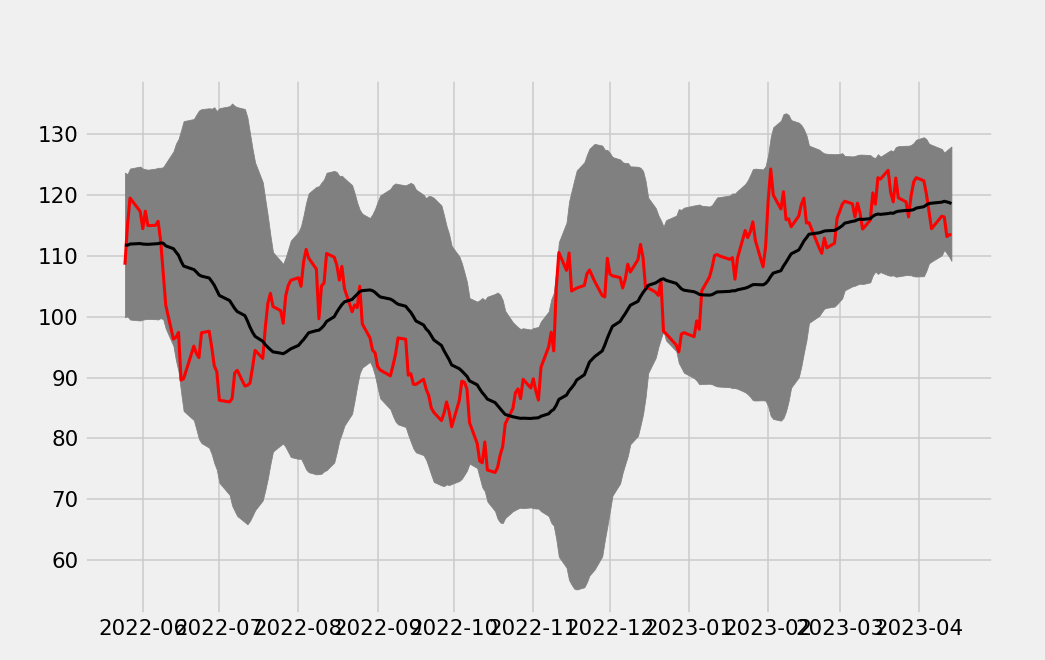

KeyError: 0

In [83]:
%matplotlib notebook
#plt.style.use('fivethirtyeight')
   
for message in consumer: 
        data = []
        df = pd.DataFrame.from_dict(message.value)
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.reset_index()
        data.append(df)
        TechIndicator = copy.deepcopy(data)

        #print(TechIndicator[0].index)
        #print(TechIndicator.tail())
        #"""
        fig, ax = init_plots('AMAT') 
        for stock in range(len(TechIndicator)):
            TechIndicator[stock]['BB_Middle_Band'], TechIndicator[stock]['BB_Upper_Band'], TechIndicator[stock]['BB_Lower_Band'] = bbands(TechIndicator[stock]['Close'], length=30, numsd=3)
            TechIndicator[stock]['BB_Middle_Band'] = TechIndicator[stock]['BB_Middle_Band']
            TechIndicator[stock]['BB_Upper_Band'] = TechIndicator[stock]['BB_Upper_Band']
            TechIndicator[stock]['BB_Lower_Band'] = TechIndicator[stock]['BB_Lower_Band']
            TechIndicator[stock] = TechIndicator[stock].dropna()
            ax.clear()
            #ax.plot(TechIndicator[stock]['Date'], TechIndicator[stock]['Close'])

            ax.fill_between(TechIndicator[stock]['Date'], TechIndicator[stock]['BB_Upper_Band'], TechIndicator[stock]['BB_Lower_Band'], color='grey', label="Band Range")
            # Plot Adjust Closing Price and Moving Averages
            ax.plot(TechIndicator[stock]['Date'], TechIndicator[stock]['Close'], color='red', lw=2, label="Close")
            ax.plot(TechIndicator[stock]['Date'], TechIndicator[stock]['BB_Middle_Band'], color='black', lw=2, label="Middle Band")
            ax.set_title("Bollinger Bands for " + str(TechIndicator[stock]['Label'][0]))
            ax.legend()
            ax.set_xlabel("Date")
            ax.set_ylabel("Close Prices")
            #plt.xticks(rotation=30)
        fig.show()
        fig.canvas.draw()

            
            #fig.canvas.draw()
        
        #"""   
        

## Step 2

#### Process the data into the desired batch format and plot it

<IPython.core.display.Javascript object>


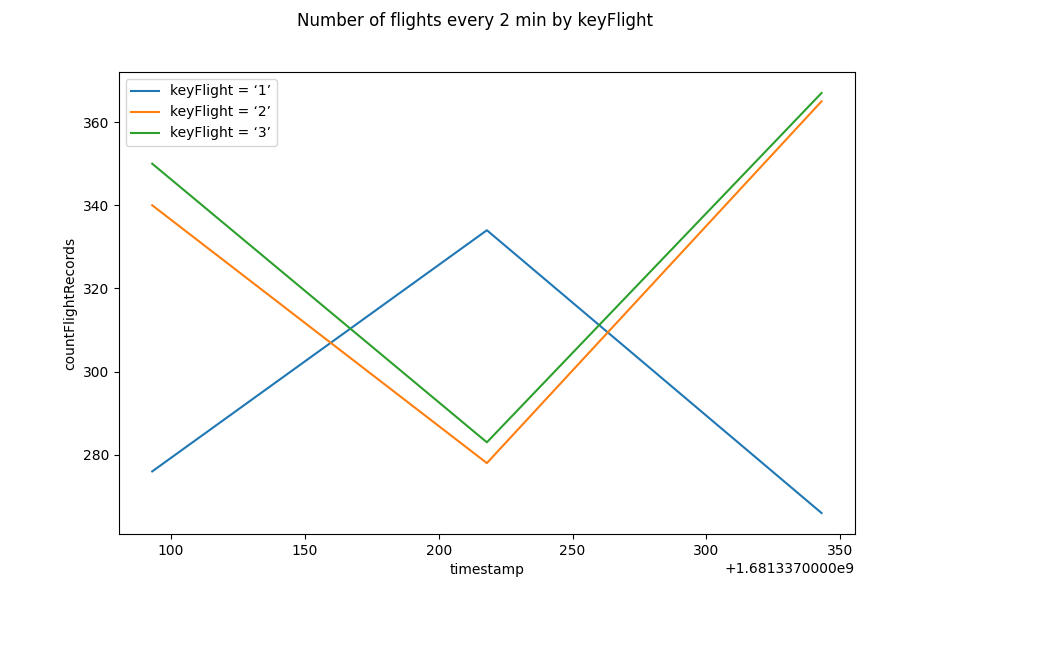

Processing records ...
number of flights for keyFlight = ‘1’ :  283
number of flights for keyFlight = ‘2’ :  258
number of flights for keyFlight = ‘3’ :  292
-----------------------
number of flights for keyFlight = ‘1’ :  363
number of flights for keyFlight = ‘2’ :  391
number of flights for keyFlight = ‘3’ :  358
-----------------------
number of flights for keyFlight = ‘1’ :  278
number of flights for keyFlight = ‘2’ :  247
number of flights for keyFlight = ‘3’ :  282
-----------------------
number of flights for keyFlight = ‘1’ :  367
number of flights for keyFlight = ‘2’ :  379
number of flights for keyFlight = ‘3’ :  379
-----------------------
number of flights for keyFlight = ‘1’ :  393
number of flights for keyFlight = ‘2’ :  295
number of flights for keyFlight = ‘3’ :  264
-----------------------
number of flights for keyFlight = ‘1’ :  295
number of flights for keyFlight = ‘2’ :  383
number of flights for keyFlight = ‘3’ :  383
-----------------------
number of flights for k

In [ ]:
# NEW
# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

    
# function to consume and display the data sent by the prodcuer
# partially taken from tutorial week 9
def countFlightRecords(consumer, fig, ax):
    try:
        
        ## 1. GENERATE THE DATA CONTAINERS
        
        time_start = 0
        
        count_of_flights = {1:0, 2:0, 3:0}
        
        two_min_flight_data = []
        
        data_plot = False 
        
        
        ## 2. PLOTING DATA CONATINERS
        
        # container for x and y values
        y1, y2, y3, x1, x2, x3 = [], [], [], [], [], []
        
        # print the start of the process
        print('Processing records ...')
        
        
        for message in consumer:   

            # in case of the first batch 
            if time_start == 0:
                
                # save the timestamp of a batch
                ts_of_batch = message.value[0]['ts']
                
                # set new ts starting point
                time_start = ts_of_batch
            
            # for any further batches
            else:
                
                # save the timestamp of a batch
                ts_of_batch = message.value[0]['ts']
                
                # if condition when two minutes have passed
                if ts_of_batch - time_start > 120:
                    
                    # set binary switch
                    data_plot = True
                    
                    print('number of flights for keyFlight = ‘1’ : ', count_of_flights[1])
                    print('number of flights for keyFlight = ‘2’ : ', count_of_flights[2])
                    print('number of flights for keyFlight = ‘3’ : ', count_of_flights[3])
                    print('-----------------------')
                    
                    # dict to save the flight countof two minutes
                    two_min_tup = () 
                    
                    # append count for each of the three keyFlights
                    two_min_tup = (ts_of_batch, count_of_flights[1], count_of_flights[2], count_of_flights[3])
                    
                    # append the dict 
                    two_min_flight_data.append(two_min_tup)
                    
                    # append the data for our plotting input
                    x1.append(ts_of_batch)
                    x2.append(ts_of_batch)
                    x3.append(ts_of_batch)
                    y1.append(count_of_flights[1])
                    y2.append(count_of_flights[2])
                    y3.append(count_of_flights[3])
                    
                    # reset the counter for eah keyFlight
                    count_of_flights[1] = 0
                    count_of_flights[2] = 0
                    count_of_flights[3] = 0

                    # set the new 'last' timestamp
                    time_start = ts_of_batch

            
            # save the list of flights received at each iteration
            data_batch_list = message.value
            
            # loop through all the lights in the list 
            for i in range(0,len(data_batch_list)):
                
                # each entry in the list is a dict containing a flight
                flight_dict = data_batch_list[i]
                
                
                if flight_dict['DAY_OF_WEEK'] == '1':
                    
                    count_of_flights[1] += 1
                    
                
                elif flight_dict['DAY_OF_WEEK'] == '2':
                    
                    count_of_flights[2] += 1
                    
                elif flight_dict['DAY_OF_WEEK'] == '3':
                    
                    count_of_flights[3] += 1
                
            
            ## 3. PLOT THE DATA
            
            # start plotting if there are three or more 2 min flight count totals
            # and if variable data_plot is True
            if len(two_min_flight_data) >= 3 and data_plot is True:
                
                
                # visualize and update the graph
                ax.clear()
                ax.plot(x1, y1, label = 'keyFlight = ‘1’')
                ax.plot(x2, y2, label = 'keyFlight = ‘2’')
                ax.plot(x3, y3, label = 'keyFlight = ‘3’')

                ax.set_xlabel('timestamp')
                ax.set_ylabel('countFlightRecords')
                plt.legend()
                fig.canvas.draw()
                
                # set binary switch
                data_plot = False
                
                # removing the item in the first position
                x1.pop(0)
                x2.pop(0)
                x3.pop(0)
                y1.pop(0)
                y2.pop(0)
                y3.pop(0)
            
            
        plt.close('all')
        
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    # call all required functions 
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()    
    countFlightRecords(consumer, fig, ax)        
    